# Data Understanding

* The dataset consists of monthly prices of Apple Inc. stock.

* The goal was to forecast future prices using time series modeling techniques.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date,timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/tusha/OneDrive/Desktop/apple_stock.csv")
df


,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000


In [3]:
df.rename(columns = {'Unnamed: 0' : 'Date'},inplace = True)

In [4]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000


In [5]:
df.columns = df.columns.map(lambda x : x.lower())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       11107 non-null  object 
 1   adj close  11107 non-null  float64
 2   close      11107 non-null  float64
 3   high       11107 non-null  float64
 4   low        11107 non-null  float64
 5   open       11107 non-null  float64
 6   volume     11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       11107 non-null  datetime64[ns]
 1   adj close  11107 non-null  float64       
 2   close      11107 non-null  float64       
 3   high       11107 non-null  float64       
 4   low        11107 non-null  float64       
 5   open       11107 non-null  float64       
 6   volume     11107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 607.5 KB


In [9]:
today = date.today()
d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days = 365)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2
print('your date will be between these dates ',start_date,end_date)

your date will be between these dates  2024-06-23 2025-06-23


In [10]:
start_date = '2024-06-22'
end_date = '2025-06-21'

In [11]:
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [12]:
df

,date,adj close,close,high,low,open,volume
10972,2024-06-24,207.670868,208.139999,212.699997,206.589996,207.720001,80727000
10973,2024-06-25,208.598785,209.070007,211.380005,208.610001,209.149994,56713900
10974,2024-06-26,212.769363,213.250000,214.860001,210.639999,211.500000,66213200
10975,2024-06-27,213.617462,214.100006,215.740005,212.350006,214.690002,49772700
10976,2024-06-28,210.145279,210.619995,216.070007,210.300003,215.770004,82542700
...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000


In [13]:
df = df[['date','close']]
df

,date,close
10972,2024-06-24,208.139999
10973,2024-06-25,209.070007
10974,2024-06-26,213.250000
10975,2024-06-27,214.100006
10976,2024-06-28,210.619995
...,...,...
11102,2024-12-27,255.589996
11103,2024-12-30,252.199997
11104,2024-12-31,250.419998
11105,2025-01-02,243.850006


In [14]:
df.reset_index(drop = True,inplace = True)

In [15]:
df

,date,close
0,2024-06-24,208.139999
1,2024-06-25,209.070007
2,2024-06-26,213.250000
3,2024-06-27,214.100006
4,2024-06-28,210.619995
...,...,...
130,2024-12-27,255.589996
131,2024-12-30,252.199997
132,2024-12-31,250.419998
133,2025-01-02,243.850006


In [16]:

import plotly.express as px

In [17]:
fig = px.line(df, x = 'date', y = 'close', title = 'apple stock price')
fig.show()

# Exploratory Analysis

* The stock shows a clear upward trend over time.

* The data was non-stationary, as seen in the line plot.

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(df):
    result = adfuller(df)
    print('p_value : %f'%result[1])
    if result[1] < 0.05:
        print('stationarity is present')
    else:
        print('no stationarity')

In [20]:
adf_test(df['close'])

p_value : 0.343953
no stationarity


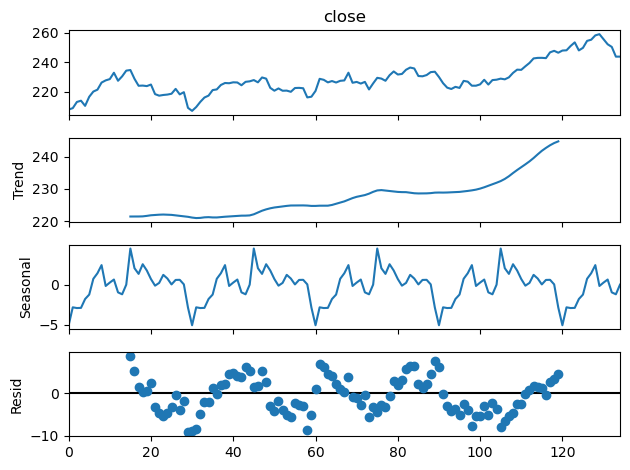

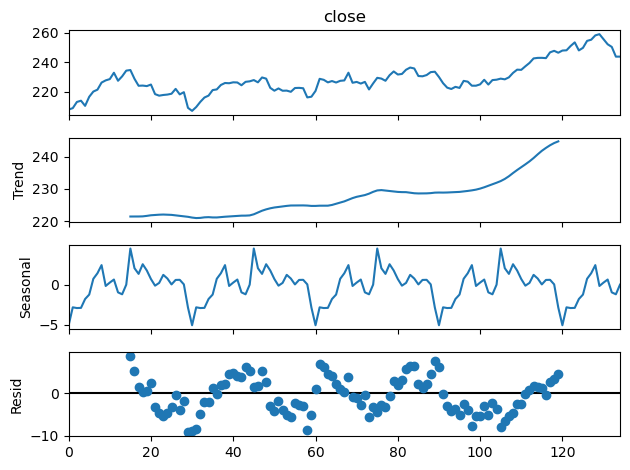

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['close'], model = 'addictive', period = 30)
decompose.plot()

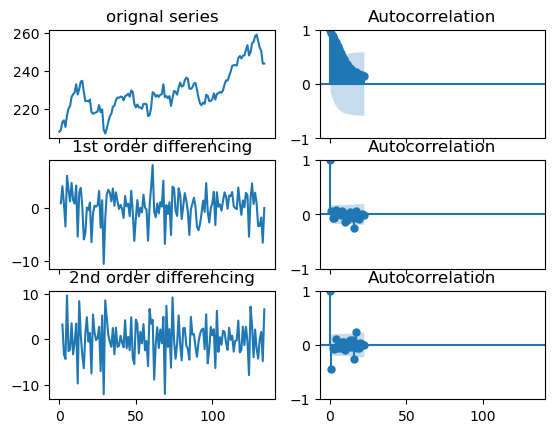

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#orignal series
fig,axes= plt.subplots(3,2,sharex = True)
axes[0,0].plot(df['close']);axes[0,0].set_title('orignal series')
plot_acf(df['close'], ax = axes[0,1])

# 1st differencing
axes[1,0].plot(df['close'].diff());axes[1,0].set_title('1st order differencing')
plot_acf(df['close'].diff().dropna(), ax = axes[1,1])


# 2nd differencing
axes[2,0].plot(df['close'].diff().diff());axes[2,0].set_title('2nd order differencing')
plot_acf(df['close'].diff().diff().dropna(), ax = axes[2,1])

plt.show()

In [23]:
d = 1

#  Making the Data Stationary

* Applied first-order differencing (d = 1) to remove trend.

* Post-differencing, the data appeared stationary — verified by flatter trends.

           0
0   1.000000
1   0.942972
2   0.882210
3   0.824352
4   0.770192
5   0.701718
6   0.636893
7   0.574591
8   0.516245
9   0.460218
10  0.408948
11  0.369862
12  0.338749
13  0.303019
14  0.269424
15  0.243411
16  0.223572
17  0.212282
18  0.190828
19  0.177730
20  0.169636
21  0.162929


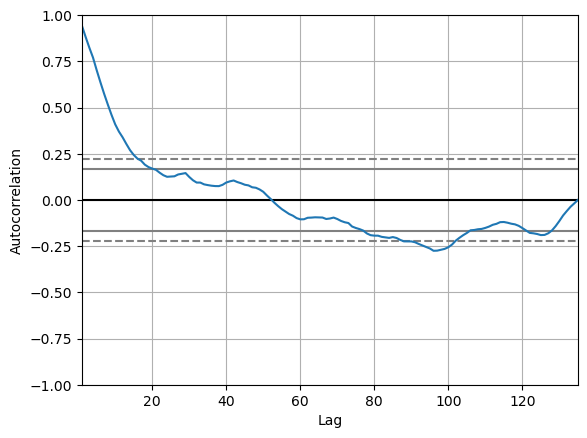

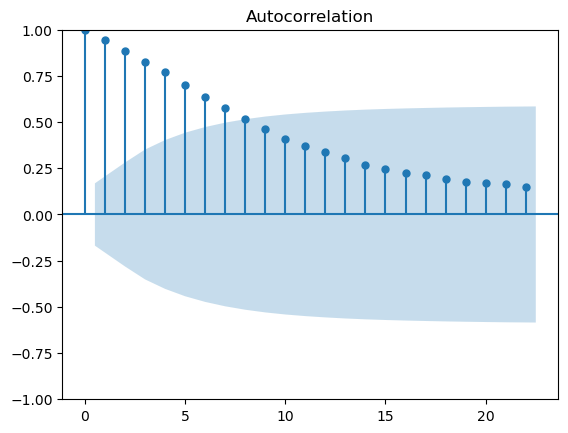

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.plotting.autocorrelation_plot(df['close'])
plot_acf(df['close'], alpha = 0.05)

from statsmodels.tsa.stattools import acf,pacf
x_acf = pd.DataFrame(acf(df['close']))
print(x_acf)

In [25]:
p = 1

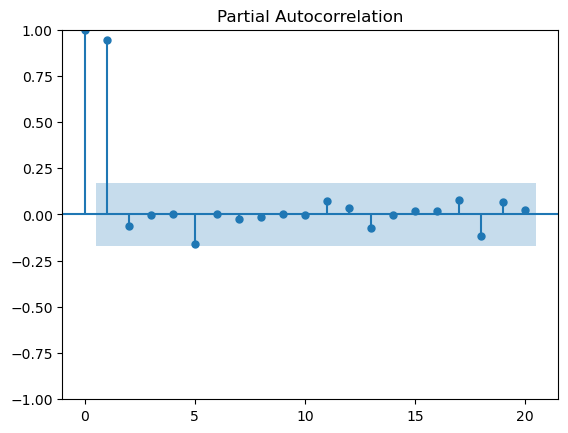

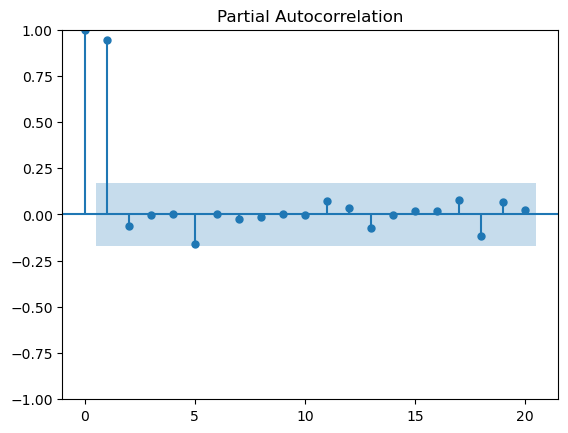

In [26]:
from statsmodels.tsa.stattools import acf,pacf
plot_pacf(df['close'], lags = 20, alpha = 0.05)


In [27]:
q = 2

# Model Identification

* PACF plot had significant spikes at lag 1 and 2 → Suggested p = 1

* ACF plot showed gradual decay, with possible significance at lag 1 and 2 → Suggested q = 2

* Chosen model: ARIMA(1,1,2)

In [28]:
!pip install pmdarima

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
p = 1
d = 1
q = 2

model = ARIMA(df['close'], order = (p,d,q))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  135
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -336.319
Date:                Mon, 23 Jun 2025   AIC                            680.637
Time:                        12:51:51   BIC                            692.229
Sample:                             0   HQIC                           685.348
                                - 135                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2720      1.991      0.137      0.891      -3.630       4.174
ma.L1         -0.2056      1.996     -0.103      0.918      -4.117       3.706
ma.L2         -0.0598      0.146     -0.410      0.6

In [31]:
forecast = model.predict(len(df['close']),len(df['close'])+30)

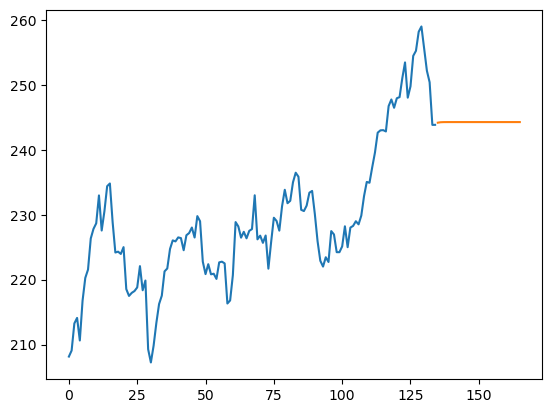

In [32]:
plt.plot(df['close'],label = 'actual')
plt.plot(forecast,label = 'forecast')

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [34]:
model = SARIMAX(df['close'],order = (1,1,2), seasonal_order = (1,1,2,12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  135
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -322.066
Date:                            Mon, 23 Jun 2025   AIC                            658.133
Time:                                    12:51:52   BIC                            677.761
Sample:                                         0   HQIC                           666.105
                                            - 135                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7790      0.531     -1.466      0.143      -1.820       0.262
ma.L1          0.8690      0.515   

In [35]:
prediction = model.predict(len(df['close']),len(df['close'])+36)

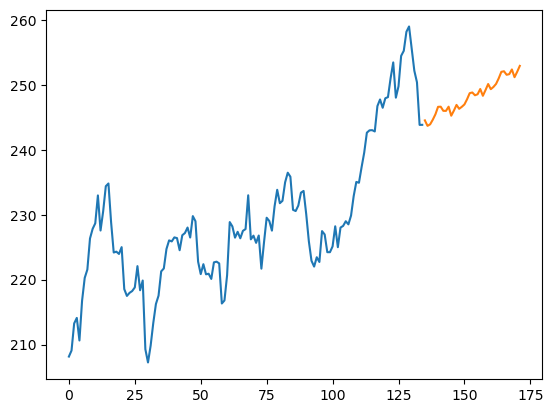

In [36]:
plt.plot(df['close'],label = 'actual')
plt.plot(prediction,label = 'forecast')

# Forecast Outcome

* Future values predicted a gradual increase in Apple stock price.

* Confidence intervals widen over time, reflecting increased uncertainty in longer-term predictions.



#  Conclusion

* ARIMA(1,1,2) successfully captures the trend in Apple's monthly stock prices.

* It's useful for short-term planning and investment analysis

